In [2]:
import pandas as pd
df1=pd.read_csv("/content/deliveries.csv")

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       260920 non-null  object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  260920 non-null  object
 15  dismissal_kind    260920 non-null  object
 16  fielder           260920 non-null  obj

In [3]:
df1.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [4]:
df1['extras_type'] = df1['extras_type'].fillna("No Extra")
df1['player_dismissed'] = df1['player_dismissed'].fillna("Not Out")
df1['dismissal_kind'] = df1['dismissal_kind'].fillna("Not Out")
df1['fielder'] = df1['fielder'].fillna("No Fielder")

In [5]:
df1.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


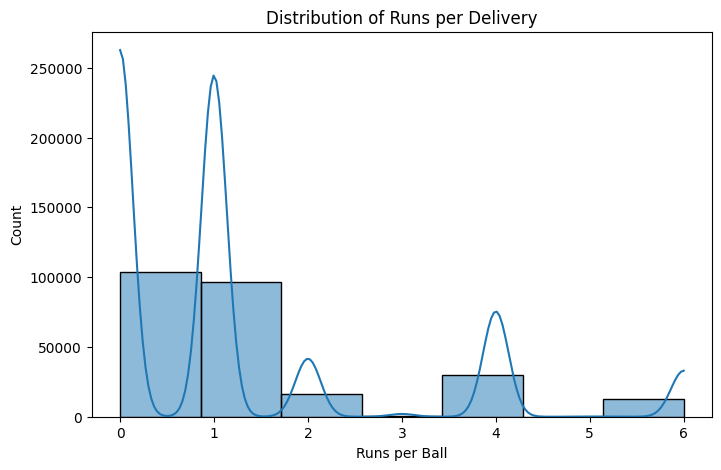

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df1['batsman_runs'], bins=7, kde=True)
plt.title("Distribution of Runs per Delivery")
plt.xlabel("Runs per Ball")
plt.ylabel("Count")
plt.show()

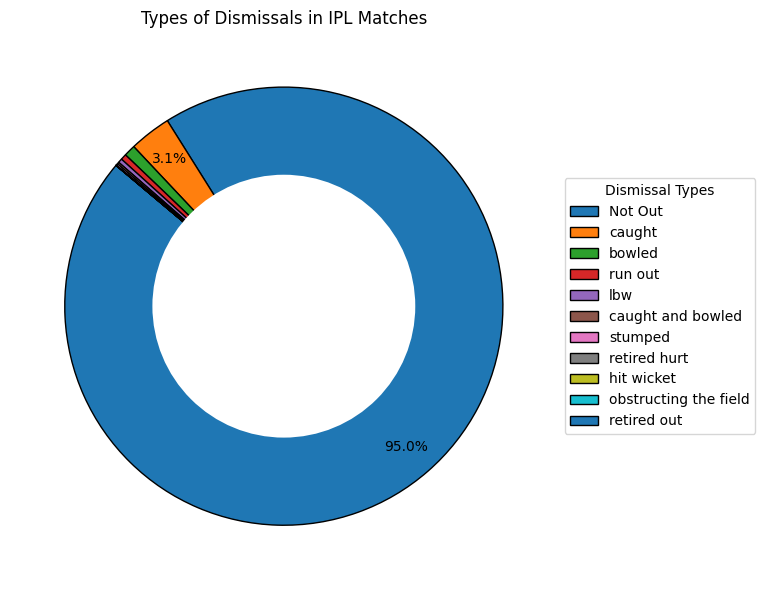

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dismissal_counts = df1['dismissal_kind'].value_counts()

def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 3 else ''

wedges, texts, autotexts = plt.pie(dismissal_counts, autopct=autopct_format, startangle=140,
                                   wedgeprops={'edgecolor': 'black'}, pctdistance=0.85)

plt.legend(wedges, dismissal_counts.index, title="Dismissal Types", loc="center left", bbox_to_anchor=(1, 0.5))

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Types of Dismissals in IPL Matches")
plt.tight_layout()
plt.show()


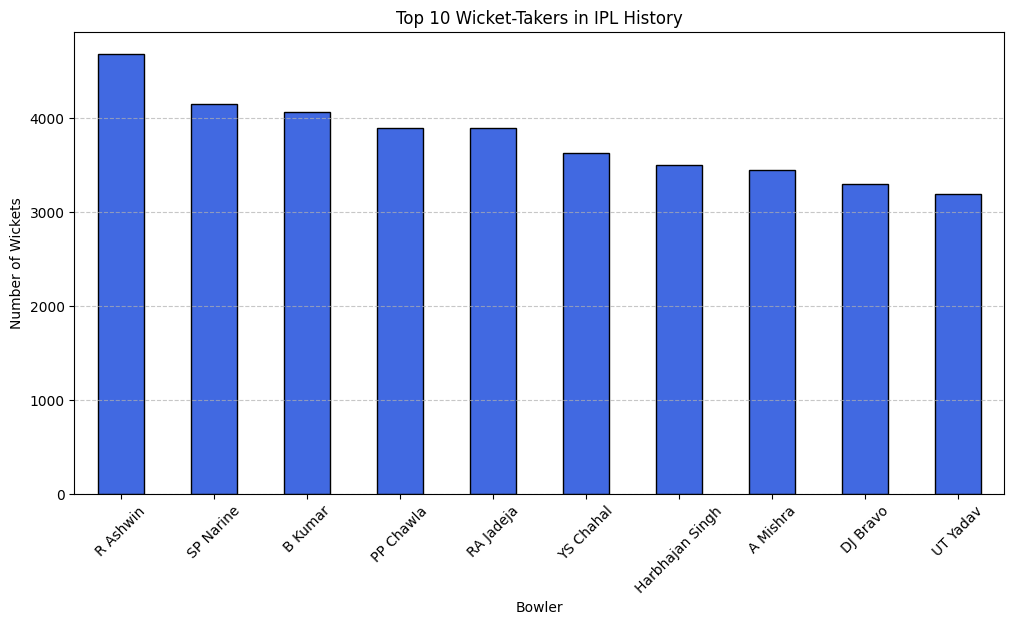

In [8]:
plt.figure(figsize=(12, 6))

wickets = df1[df1['player_dismissed'].notna()]

top_bowlers = wickets['bowler'].value_counts().head(10)  # Top 10 wicket-takers

top_bowlers.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Bowler")
plt.ylabel("Number of Wickets")
plt.title("Top 10 Wicket-Takers in IPL History")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

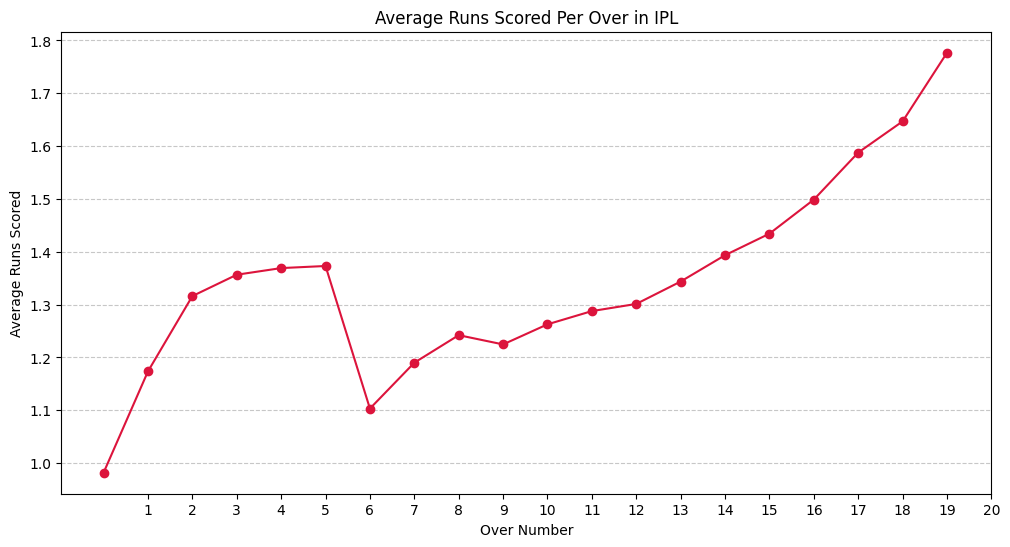

In [9]:
plt.figure(figsize=(12, 6))

avg_runs_per_over = df1.groupby('over')['total_runs'].mean()

plt.plot(avg_runs_per_over.index, avg_runs_per_over.values, marker='o', linestyle='-', color='crimson')

plt.xlabel("Over Number")
plt.ylabel("Average Runs Scored")
plt.title("Average Runs Scored Per Over in IPL")
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

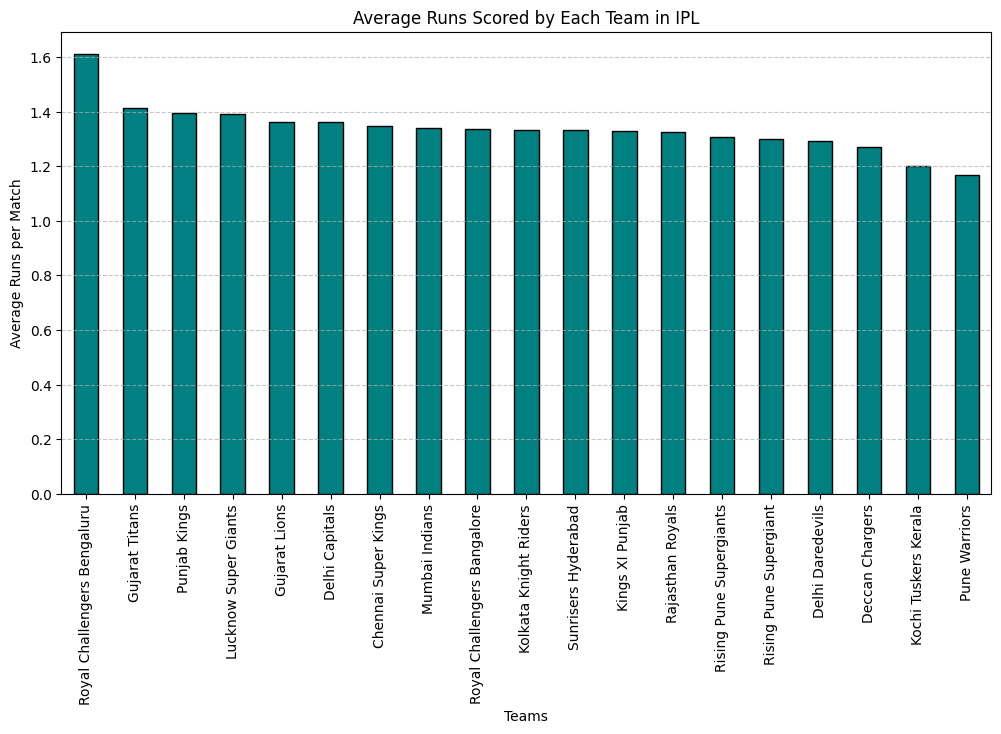

In [10]:
plt.figure(figsize=(12, 6))

avg_runs_per_team = df1.groupby('batting_team')['total_runs'].mean().sort_values(ascending=False)

avg_runs_per_team.plot(kind='bar', color='teal', edgecolor='black')
plt.xlabel("Teams")
plt.ylabel("Average Runs per Match")
plt.title("Average Runs Scored by Each Team in IPL")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
!pip install squarify

In [23]:
!pip install plotly

In [24]:
import plotly.express as px

top_batsmen = df1.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.treemap(
    top_batsmen,
    path=['batter'],
    values='batsman_runs',
    title="Top 10 Run-Scorers in IPL History",
    color='batsman_runs',
    color_continuous_scale='Oranges'
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [17]:
print(df1['player_dismissed'].unique())


['Not Out' 'SC Ganguly' 'RT Ponting' 'DJ Hussey' 'R Dravid' 'V Kohli'
 'JH Kallis' 'W Jaffer' 'MV Boucher' 'B Akhil' 'CL White' 'AA Noffke'
 'Z Khan' 'SB Joshi' 'PA Patel' 'ML Hayden' 'MS Dhoni' 'SK Raina'
 'JDP Oram' 'K Goel' 'JR Hopes' 'Yuvraj Singh' 'KC Sangakkara' 'T Kohli'
 'YK Pathan' 'SR Watson' 'DS Lehmann' 'M Kaif' 'M Rawat' 'RA Jadeja'
 'SK Warne' 'V Sehwag' 'L Ronchi' 'DJ Thornely' 'ST Jayasuriya' 'PR Shah'
 'RV Uthappa' 'AM Nayar' 'SM Pollock' 'S Chanderpaul' 'LRPL Taylor'
 'Y Venugopal Rao' 'VVS Laxman' 'AC Gilchrist' 'RG Sharma' 'SB Styris'
 'AS Yadav' 'A Symonds' 'WPUJC Vaas' 'SB Bangar' 'PP Ojha' 'BB McCullum'
 'WP Saha' 'Mohammad Hafeez' 'DPMD Jayawardene' 'IK Pathan' 'B Lee'
 'S Sohal' 'Kamran Akmal' 'Shahid Afridi' 'G Gambhir' 'MEK Hussey'
 'DJ Bravo' 'MA Khote' 'Harbhajan Singh' 'GC Smith' 'D Salunkhe'
 'RR Sarwan' 'PP Chawla' 'S Sreesanth' 'VRV Singh' 'SS Tiwary' 'P Kumar'
 'AB Agarkar' 'M Kartik' 'LR Shukla' 'AM Rahane' 'S Dhawan' 'Shoaib Malik'
 'KD Karthik' 'R B

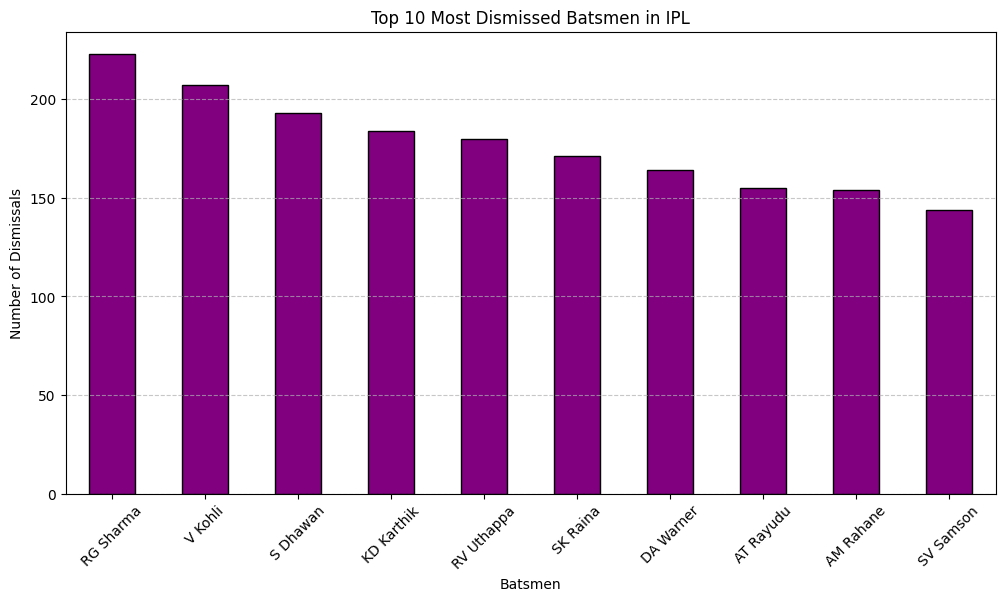

In [18]:
plt.figure(figsize=(12, 6))

dismissed_players = df1['player_dismissed'].dropna()
dismissed_players = dismissed_players[dismissed_players != "Not Out"]

most_dismissed_batsmen = dismissed_players.value_counts().head(10)

most_dismissed_batsmen.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel("Batsmen")
plt.ylabel("Number of Dismissals")
plt.title("Top 10 Most Dismissed Batsmen in IPL")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


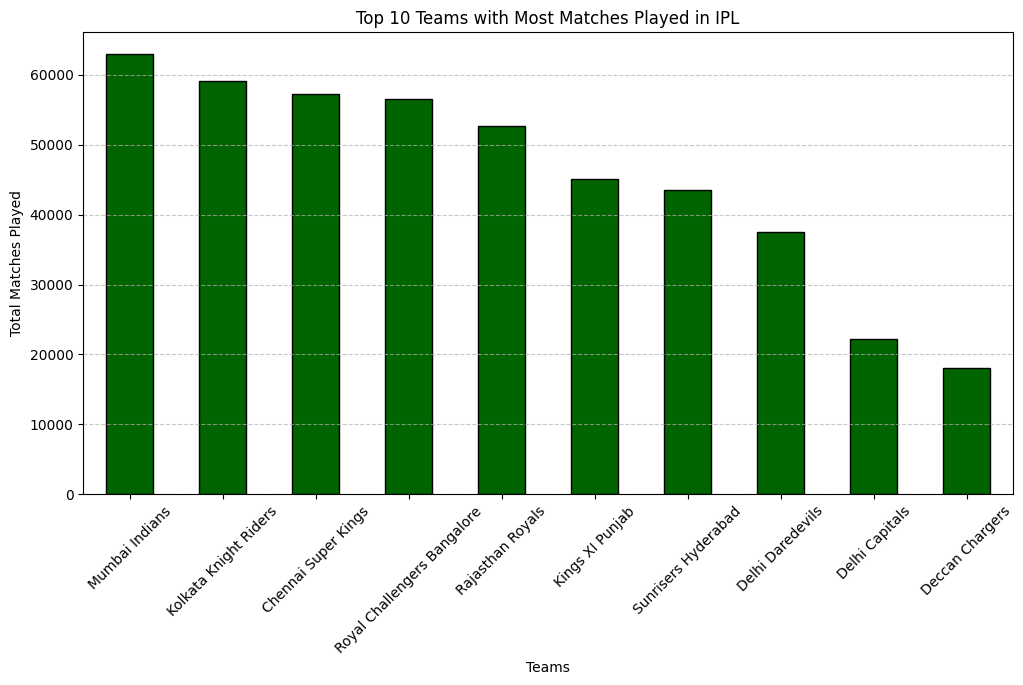

In [25]:
plt.figure(figsize=(12, 6))

team_matches = pd.concat([df1['batting_team'], df1['bowling_team']]).value_counts().head(10)

team_matches.plot(kind='bar', color='darkgreen', edgecolor='black')

plt.xlabel("Teams")
plt.ylabel("Total Matches Played")
plt.title("Top 10 Teams with Most Matches Played in IPL")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

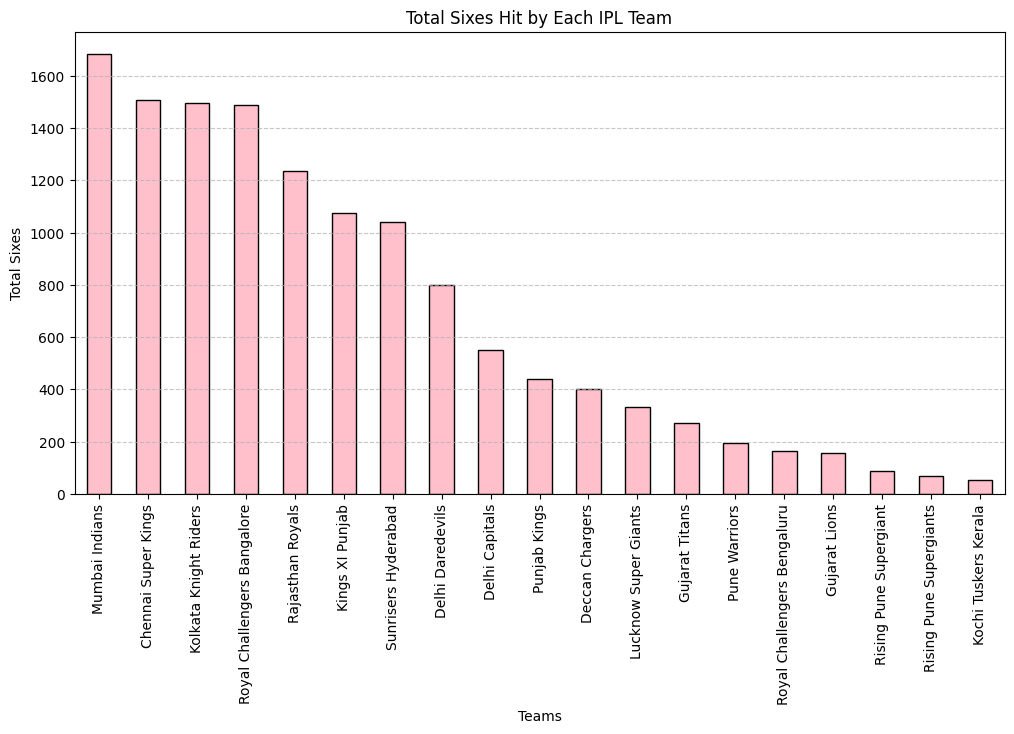

In [28]:
plt.figure(figsize=(12, 6))

sixes_by_team = df1[df1['batsman_runs'] == 6].groupby('batting_team').size().sort_values(ascending=False)

sixes_by_team.plot(kind='bar', color='pink', edgecolor='black')

plt.xlabel("Teams")
plt.ylabel("Total Sixes")
plt.title("Total Sixes Hit by Each IPL Team")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

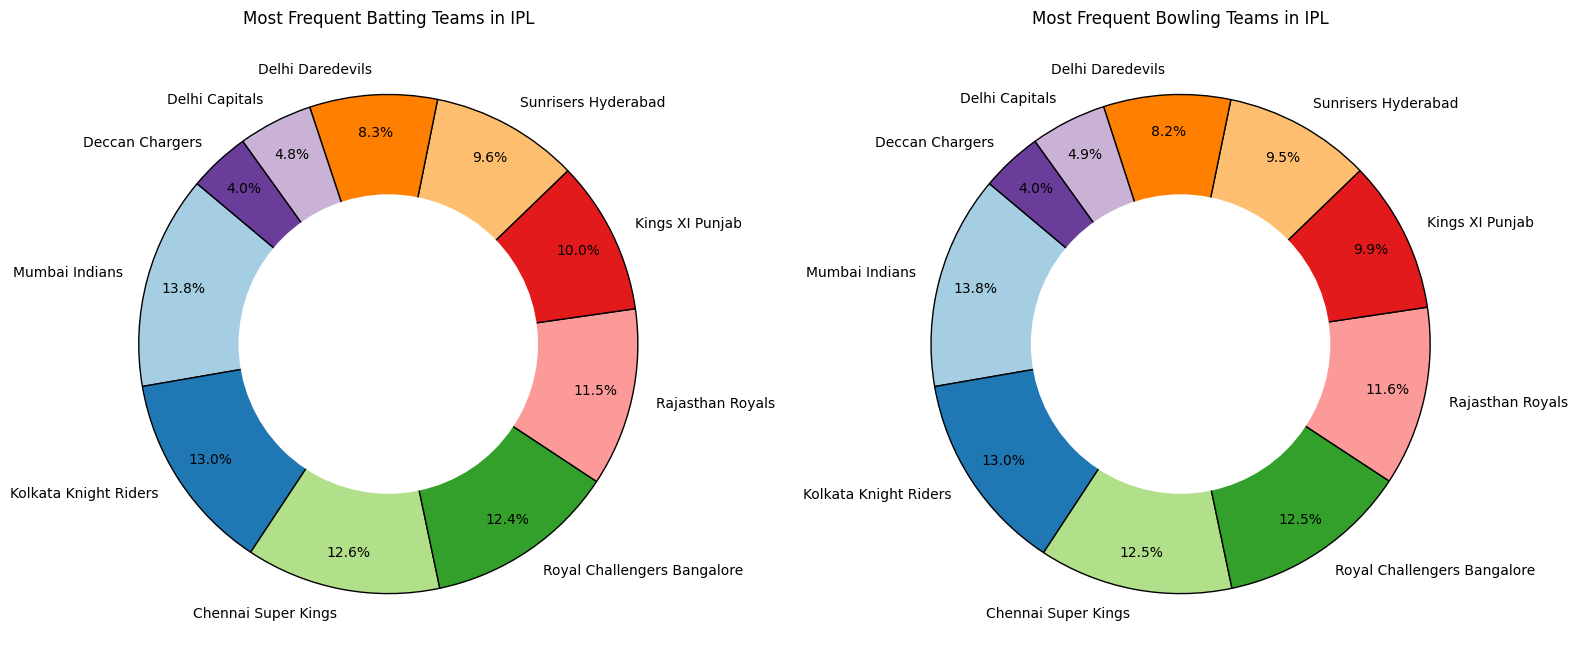

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Create a 1-row, 2-column layout

# Most Frequent Batting Team
batting_counts = df1['batting_team'].value_counts().head(10)
wedges, texts, autotexts = axes[0].pie(
    batting_counts, labels=batting_counts.index, autopct='%1.1f%%', startangle=140,
    wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, colors=plt.cm.Paired.colors
)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
axes[0].add_artist(centre_circle)
axes[0].set_title("Most Frequent Batting Teams in IPL")

# Most Frequent Bowling Team
bowling_counts = df1['bowling_team'].value_counts().head(10)
wedges, texts, autotexts = axes[1].pie(
    bowling_counts, labels=bowling_counts.index, autopct='%1.1f%%', startangle=140,
    wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, colors=plt.cm.Paired.colors
)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
axes[1].add_artist(centre_circle)
axes[1].set_title("Most Frequent Bowling Teams in IPL")

plt.tight_layout()
plt.show()
